In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#-----------inputs--------------------
script = "Approximation.ipynb"
inner_file = "Inner Hull.csv"
outer_file = "Outer Hull.csv"
concrete_density = 1200 # Concrete density = 1200 kg/m^3
#-------------------------------------

script_dir = os.path.abspath('') # absolute file path in Jupyter

# Read the inner hull coordinates
file_path = os.path.join(script_dir, inner_file) # file path for the text file input
in_coor = pd.read_csv(file_path, header=None)
x_in = in_coor[0]
y_in = in_coor[1]
z_in = in_coor[2]

# Read the outer hull coordinates
file_path = os.path.join(script_dir, outer_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)
x_out = out_coor[0]
y_out = out_coor[1]
z_out = out_coor[2]

# Inner Hull Volume: Assume station is filled up with concrete
station_no = x_in.nunique() # number of stations
station = x_in.unique() # location of each station

# Inner Hull Volume
vol_in = []

# Loop through each station
# The loop ends at station_no - 2 because each loop uses the kth and the (k+1)th station
# Starts at 1 to skip 0,0,0
for k in range(1,station_no-2,1):

    # Coordinates of points in the outer frame sharing an X-coordinate with the current station
    X1_value = station[k]
    Y1 = []
    Z1 = []

    # Coordinates of points in the outer frame sharing an X-coordinate with the next station
    X2_value = station[k+1]
    Y2 = []
    Z2 = []

    # Loop through each x coordinate in the outer hull
    for i in range(0,len(x_out),1):

        # If the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])

        # Otherwise, if the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])

    volume = 0
    if len(Y1)/2 == 0:
        n = int(len(Y1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
    else:
        n = int((len(Y1)-1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        # triangle piece at the bottom
        area1 = abs(Y1[n-1])*abs(Z1[n-1])/2*2
        area2 = abs(Y2[n-1])*abs(Z2[n-1])/2*2
        volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        vol_in.append(volume)

def vol_end(l,w,h):
    volume = l*w*h/3
    return volume

# Volumes of decks
X1_value = station[0]
X2_value = station[0+1]
Y1 = []
Y2 = []
Z1 = []
Z2 = []

for i in range(0,len(x_in),1):
    if x_in[i] == X1_value:
        Y1.append(y_in[i])
        Z1.append(z_in[i])

    elif x_in[i] == X2_value:
        Y2.append(y_in[i])
        Z2.append(z_in[i])
    
l = abs(max(Y2)-min(Y2))
w = abs(max(Z2)-min(Z2))
h = abs(X2_value - X1_value)
volume = vol_end(l,w,h)
vol_in.insert(0, volume)

X1_value = station[len(station)-1]
X2_value = station[len(station)-2]
Y1 = []
Y2 = []
Z1 = []
Z2 = []

for i in range(0,len(x_in),1):
    if x_in[i] == X1_value:
        Y1.append(y_in[i])
        Z1.append(z_in[i])

    elif x_in[i] == X2_value:
        Y2.append(y_in[i])
        Z2.append(z_in[i])
    
l = abs(max(Y2)-min(Y2))
w = abs(max(Z2)-min(Z2))
h = abs(X2_value - X1_value)
volume = vol_end(l,w,h)
vol_in.append(volume)

In [2]:
# Outer Hull Volume: Assume station is filled up with concrete
station_no = x_out.nunique() # number of stations
station = x_out.unique() # location of each station

# Outer Hull Volume
vol_out = []
for k in range(1,station_no-2,1):
    X1_value = station[k]
    X2_value = station[k+1]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []

    for i in range(0,len(x_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])

        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    
    volume = 0
    if len(Y1)/2 == 0:
        n = int(len(Y1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
    else:
        n = int((len(Y1)-1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        # triangle piece at the bottom
        area1 = abs(Y1[n-1])*abs(Z1[n-1])/2*2
        area2 = abs(Y2[n-1])*abs(Z2[n-1])/2*2
        volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        vol_out.append(volume)

        
# Volumes of decks
X1_value = station[0]
X2_value = station[0+1]
Y1 = []
Y2 = []
Z1 = []
Z2 = []

for i in range(0,len(x_out),1):
    if x_out[i] == X1_value:
        Y1.append(y_out[i])
        Z1.append(z_out[i])

    elif x_out[i] == X2_value:
        Y2.append(y_out[i])
        Z2.append(z_out[i])
    
l = abs(max(Y2)-min(Y2))
w = abs(max(Z2)-min(Z2))
h = abs(X2_value - X1_value)
volume = vol_end(l,w,h)
vol_out.insert(0, volume)

X1_value = station[len(station)-1]
X2_value = station[len(station)-2]
Y1 = []
Y2 = []
Z1 = []
Z2 = []

for i in range(0,len(x_out),1):
    if x_out[i] == X1_value:
        Y1.append(y_out[i])
        Z1.append(z_out[i])

    elif x_out[i] == X2_value:
        Y2.append(y_out[i])
        Z2.append(z_out[i])
    
l = abs(max(Y2)-min(Y2))
w = abs(max(Z2)-min(Z2))
h = abs(X2_value - X1_value)
volume = vol_end(l,w,h)
vol_out.append(volume)

In [3]:
stat_vol = []
for i in range(0,len(vol_in),1):
    stat_vol.append(vol_out[i] - vol_in[i])

canoe_vol = 0
stat_mass = []
for i in range(0,len(stat_vol),1):
    canoe_vol = canoe_vol + stat_vol[i]
    stat_mass.append(stat_vol[i]/(10**9)*concrete_density)
canoe_m = canoe_vol/(10**9)*concrete_density

print('The mass of canoe is ', canoe_m, ' kg.')

The mass of canoe is  170.1408230314215  kg.


In [4]:
# Plot SFD and BMD
stand = canoe_m/2 # two stands spaced equally
stand_force = [stand, stand]

length = max(x_out)
stand_po = [length/3, length/3*2]

stat_x = []
for i in range(0,len(station)-1,1):
    stat_x.append((station[i]+station[i+1])/2)

g = 9.81
x = []
shear = []
for i in range(0,int(length),1):
    x.append(i)
    shear_force = 0
    for j in range(0,len(stat_x),1):
        if i >= stat_x[j]:
            shear_force  = shear_force + (-1)*stat_mass[j]*g
        else:
            shear_force = shear_force
    for k in range(0,len(stand_po),1):
        if i >= stand_po[k]:
            shear_force = shear_force + stand_force[k]*g
        else:
            shear_force = shear_force
    shear.append(shear_force)

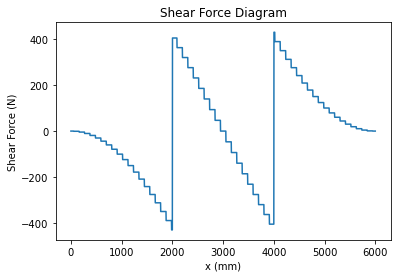

In [5]:
plt.plot(x,shear)
plt.title('Shear Force Diagram')
plt.xlabel('x (mm)')
plt.ylabel('Shear Force (N)')
plt.show()


# Export points to csv file:
df1 = pd.DataFrame(data={'Length': x, 'Shear': shear})

csv_file = 'Length_vs_Shear_Display_Stand.csv'
script_dir = os.path.abspath('')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)

In [6]:
moment = []
moment.append(0)
bending_moment = 0
for i in range(0,len(x)-1,1):
    bending_moment = bending_moment + (x[i+1]-x[i])*shear[i+1]/1000
    moment.append(bending_moment)
    

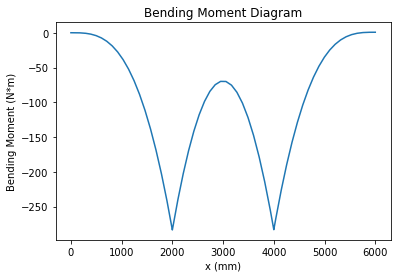

In [7]:
plt.plot(x,moment)
plt.title('Bending Moment Diagram')
plt.xlabel('x (mm)')
plt.ylabel('Bending Moment (N*m)')
plt.show()

# Export points to csv file:
df1 = pd.DataFrame(data={'Length': x, 'Moment': moment})

csv_file = 'Length_vs_Moment_Display_Stand.csv'
script_dir = os.path.abspath('')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)

In [8]:
# export the section volume, section weight, shear force, and bending moment to excel
stat_weight = []
for i in range(0,len(stat_vol),1):
    station_weight = stat_mass[i]*g
    stat_weight.append(station_weight)

stat_no = np.arange(1, len(stat_vol)+1, 1)
df1 = pd.DataFrame(data={'Station Number': stat_no, 'Volume (m^3)': stat_vol, 'Mass (kg)': stat_mass, 'Weight (N)': stat_weight})
df1['Volume (m^3)'] = df1['Volume (m^3)']/(10**9)

csv_file = 'Station Information.csv'
script_dir = os.path.abspath('')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)

In [9]:
max(shear)

429.77392446835324

In [10]:
min(shear)

-429.77392446835313

In [11]:
np.sum(shear)

714.5934115576529

In [12]:
# export the values to csv file
titles = ['Positive Shear [N]', 'Negative Shear [N]', 'Positive Bending Moment [Nm]', 'Negative Bending Moment [Nm]', 'Moment at the end [Nm]']
values = [max(shear), min(shear), max(moment), min(moment), moment[len(moment)-1]]
station_no = []
max_width = []
max_depth = []
station_t = [] # Station thickness

for value in [max(shear), min(shear)]:
    shear_index = shear.index(value)
    xshear = x[shear_index]
    for i in range(0,len(station)-1,1):
        if (xshear >= station[i] and xshear < station[i+1]):
            station_index = i+1

    X1_value = station[station_index-1]
    X2_value = station[station_index]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []        
    for i in range(0,len(y_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    width = (max(Y1)-min(Y1)+max(Y2)-min(Y2))/2
    depth = (abs(min(Z1))+abs(min(Z2)))/2
    max_width.append(width)
    max_depth.append(depth)
    station_no.append(station_index)
    station_t.append(abs(X2_value - X1_value))

for value in [max(moment), min(moment)]:
    moment_index = moment.index(value)
    xmoment = x[moment_index]
    for i in range(0,len(station)-1,1):
        if (xmoment >= station[i] and xmoment < station[i+1]):
            station_index = i+1

    X1_value = station[station_index-1]
    X2_value = station[station_index]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []        
    for i in range(0,len(y_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    width = (max(Y1)-min(Y1)+max(Y2)-min(Y2))/2
    depth = (abs(min(Z1))+abs(min(Z2)))/2
    max_width.append(width)
    max_depth.append(depth)
    station_no.append(station_index)
    station_t.append(abs(X2_value - X1_value))
    
station_no.append(len(station)-1)  
max_width.append('')
max_depth.append('')
station_t.append('')

df1 = pd.DataFrame(data={'': titles, 'Value': values, 'Station No': station_no, 'Max Width [mm]': max_width, 'Max Depth [mm]': max_depth, 'Station Thickness [mm]': station_t})

csv_file = 'Shear_and_Moment_Display_Stand.csv'
script_dir = os.path.abspath('')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)